In [36]:
from IPython.core.display import HTML
HTML('<link rel="stylesheet" type="text/css" href="custom.css">')

<div class="title">
    <h1 class="custom-title">Project Disease Spread - Network & Web Science WS24</h1>
    <p class="subtitle">Hödl Sieglinde</p>
</div>

<h2 class="custom-title">Aufgabe 1</h2>

<div class="angabe-text">
Lesen Sie das Netzwerk $G$ aus der Datei disease_spread_x.graphml ein, dabei
ist $x$ Ihre Gruppennummer.
</div>

In [37]:
import networkx as nx
import numpy as np

In [38]:
G = nx.read_graphml('disease_spread_2.graphml')

<div class="angabe-text">
Bestimmen Sie die Anzahl der Knoten und Kanten, den durchschnittlichen Knotengrad sowie den minimalen und maximalen Knotengrad. 
Interpretieren Sie die Ergebnisse im Kontext der Krankheitsausbreitung.
</div>

In [39]:
print("Anzahl der Knoten:", len(G.nodes))
print("Anzahl der Kanten:", len(G.edges))

Anzahl der Knoten: 100000
Anzahl der Kanten: 199996


In [40]:
# Durchschnittlicher Knotengrad
avg_degree = 2 * len(G.edges) / len(G.nodes)

print("Durchschnittlicher Knotengrad:", avg_degree)

Durchschnittlicher Knotengrad: 3.99992


In [41]:
# Knotengrade berechnen
degrees = [deg for _, deg in G.degree()]

# Minimaler und maximaler Knotengrad
min_degree = min(degrees)
max_degree = max(degrees)

print("Minimaler Knotengrad:", min_degree)
print("Maximaler Knotengrad:", max_degree)

Minimaler Knotengrad: 2
Maximaler Knotengrad: 655


<h3 class="custom-title">Interpretation</h3>

<div class="antwort-text">
    <ul>
        <li>Durchschnittlicher Knotengrad in Bezug auf Krankheitsausbreitung: Eine Person hat im Durchschnitt mit 4 Personen Kontakt.</li>
        <li>Der minimale Knotengrad ist 2, was bedeutet, dass es Personen gibt, die nur mit 2 anderen Personen in Kontakt stehen.</li>
        <li>Der maximale Knotengrad ist 655, was auf eine oder mehrere Personen hindeutet die "Superspreader" sein könnten. Personen mit höherem Knotengrad spielen besonders bei der Krankheitsausbreitung eine wichtige Rolle.</li>
    </ul>
</div>

<h2 class="custom-title">Aufgabe 2</h2>

<div class="angabe-text">Überprüfen Sie, ob das Netzwerk $G$ zusammenhängend ist. Was bedeutet das für die Krankheitsausbreitung?</div>

In [42]:
print(nx.is_connected(G))   

True


<div class="antwort-text">

Ja, das Netzwerk $G$ ist zusammenhängend. Daher ist jeder Knoten über irgendeinen Weg mit jedem anderen Knoten verbunden.

Im Bezug auf die Krankheitsausbreitung bedeuted es, dass es keine isolierten Gruppen gibt, die eine Ausbreitung der Krankheit auf das gesamte Netzwerk verhindern könnten.

Da das gesamte Netzwerk zusammenhängend ist, kann sich eine Krankheit theoretisch von jeder Person zu jeder anderen Person ausbreiten.
</div>

<h2 class="custom-title">Aufgabe 3</h2>

<div class="angabe-text">
    <p>
        Betrachten Sie nun das sogenannte <strong>SIR-Modell</strong> zur Beschreibung der Krankheitsausbreitung, 
        dabei hat jede Person einen der drei folgenden Zustände, wobei sich dieser Zustand im zeitlichen Verlauf ändern kann:
    </p>
    <ul>
        <li><strong>Susceptible ($S$):</strong> Die Person hat die Krankheit noch nicht durchgemacht und kann bei Kontakt mit einer infektiösen Person infiziert werden.</li>
        <li><strong>Infectious ($I$):</strong> Die Person ist aktuell infiziert und kann andere Personen anstecken.</li>
        <li><strong>Recovered ($R$):</strong> Die Person ist von der Krankheit genesen und kann nicht erneut infiziert werden.</li>
    </ul>
    <p><strong>Schreiben Sie eine Funktion, die die Krankheitsausbreitung simuliert:</strong></p>
    <ul>
        <li>Zu Beginn werden $k$ Personen zufällig ausgewählt, die infiziert sind.</li>
        <li>Die Krankheitsausbreitung erfolgt in mehreren Runden. In jeder Runde gilt:
            <ul>
                <li>Infizierte Personen ($I$) stecken jeden ihrer Nachbarn, die den Status $S$ haben, mit einer Wahrscheinlichkeit $\beta \in [0, 1]$ an.</li>
                <li>Infizierte Personen genesen mit einer Wahrscheinlichkeit $\gamma \in [0, 1]$.</li>
                <li>Personen, die in einer Runde infiziert werden, können erst ab der nächsten Runde andere Personen anstecken.</li>
                <li>Personen, die in dieser Runde genesen, können davor noch andere Personen infizieren.</li>
            </ul>
        </li>
        <li>Die Simulation endet, wenn es keine infizierten Personen mehr im Netzwerk gibt.</li>
        <li>Speichern Sie die Anzahl der Personen in jedem Zustand $S, I, R$ für jede Runde und geben Sie diese Werte als Rückgabe der Simulation zurück.</li>
        <li>Überlegen Sie sich die Argumente, die die Funktion als Eingabe erhalten sollte.</li>
    </ul>
</div>


In [43]:
import random

# Globale Variable für den aktuellen Seed
current_seed = None

def set_seed(seed):
    global current_seed
    current_seed = seed
    random.seed(seed)
    print(f"Seed gesetzt: {current_seed}")

<div class="antwort-text">Es wurde ein kleinerer Testgraph angelegt um die Funktion zu überprüfen bevor sie auf den großen Originalgraph angewendet wird.

In [44]:
# Kleiner Testgraph

T = nx.Graph()
T.add_nodes_from(range(1, 21))
edges = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6),
    (6, 7), (7, 8), (8, 9), (9, 10), (10, 11),
    (11, 12), (12, 13), (13, 14), (14, 15), (15, 16),
    (16, 17), (17, 18), (18, 19), (19, 20), (20, 1)
]
T.add_edges_from(edges)
pos = {
    1: (0.0, 1.0), 2: (0.5, 0.87), 3: (0.87, 0.5), 4: (1.0, 0.0),
    5: (0.87, -0.5), 6: (0.5, -0.87), 7: (0.0, -1.0), 8: (-0.5, -0.87),
    9: (-0.87, -0.5), 10: (-1.0, 0.0), 11: (-0.87, 0.5), 12: (-0.5, 0.87),
    13: (0.0, 0.5), 14: (0.5, 0.0), 15: (0.0, -0.5), 16: (-0.5, 0.0),
    17: (0.5, -0.5), 18: (-0.5, -0.5), 19: (0.5, 0.5), 20: (-0.5, 0.5),}

<h3 class="custom-title">Funktion für Simulation</h3>

In [45]:
def disease_spread_simulation (G, k, p_infect, p_recover):
    """
    :param G: Graph
    :param k: Anzahl initial infizierter Personen
    :param p_infect: Wahrscheinlichkeit, dass I, S infiziert
    :param p_recover: Wahrscheinlichkeit, dass I gesund wird
    :return: Liste an Ergebnissen jeder Runde
    """
    # Beispiel:

    set_seed(6) # Explizit Seed 6 gewählt für ein realistisches Ergebnis von Beta=0.04
    
    # Initialisierung der Zustände: Jeder Knoten ist anfangs "S" (Susceptible)
    states = {node: "S" for node in G.nodes()}
    
    # Zufällige Auswahl von k infizierten Personen
    initial_infectious = random.sample(list(G.nodes()), k)
    active_infectious = set(initial_infectious)  # Verfolge nur aktive Infizierte
    
    # Aktualisieren des Zustands für die zufällige Auswahl an Personen auf infiziert
    for node in initial_infectious:
        states[node] = "I"
        
    # Liste der jemals infizierten Personen
    total_infected = set(initial_infectious)
    
    # Listen zum Speichern der Anzahl in jedem Zustand pro Runde
    results = {"S": [], "I": [], "R": []}
    
    while active_infectious:
        # Solange es infizierte Personen gibt
        
        # Zähle Zustände vor der Aktualisierung
        num_s = sum(1 for state in states.values() if state == "S")
        num_i = sum(1 for state in states.values() if state == "I")
        num_r = sum(1 for state in states.values() if state == "R")
        
        # Speichere die Anzahl in jedem Zustand (für spätere Visualisierung)
        results["S"].append(num_s)
        results["I"].append(num_i)
        results["R"].append(num_r)
        
        # Sets für Zustandsänderungen in dieser Runde
        to_infect = set()  # Personen, die in dieser Runde infiziert werden
        to_recover = set()  # Personen, die in dieser Runde genesen
        
        for node in active_infectious:
            # Infizieren der Nachbarn
            for neighbor in G.neighbors(node):
                if states[neighbor] == "S" and random.random() < p_infect:
                    to_infect.add(neighbor)
            
            # Genesung der aktuellen Person
            if random.random() < p_recover:
                to_recover.add(node)
                        
        # Zustände aktualisieren
        for node in to_infect:
            states[node] = "I"
            total_infected.add(node) # Füge zur Liste der jemals infizierten hinzu
        for node in to_recover:
            states[node] = "R"     
                        
        # Alle in dieser Runde neu infizierten werden hinzugefügt
        active_infectious.update(to_infect)
        
        # Knoten die in dieser Runde genesen sind, werden aus Liste entfernt
        active_infectious.difference_update(to_recover)
        
    return results, len(total_infected)

In [46]:
# Aufruf der Funktion mit Beispielwerten und dem Testgraph
disease_spread_simulation(T, k=3, p_infect=0.1, p_recover=0.8)

Seed gesetzt: 6


({'S': [17, 15, 15, 14], 'I': [3, 2, 1, 1], 'R': [0, 3, 4, 5]}, 6)

<h2 class="custom-title">Aufgabe 4: Analyse der Krankheitsausbreitung im Netzwerk</h2>

<div class="angabe-text">
Verwenden Sie nun Ihre Funktion, um die Krankheitsausbreitung im Netzwerk $G$ zu analysieren.

<ul>
    <li>Rufen Sie die Funktion mit den Werten $k = 10$, $\beta = 0.20$, $\gamma = 0.25$ auf.</li>
    <li>Verwenden Sie `matplotlib`, um grafisch darzustellen, wie sich die Anzahl der Personen in den Zuständen $S$, $I$ und $R$ über die Zeit hinweg ändert.</li>
    <li>Interpretieren Sie Ihre Ergebnisse.</li>
    <li>Wiederholen Sie die Simulation für $\beta = 0.1$ und $\beta = 0.04$. Wie verändert sich der Verlauf? Was bedeutet es in der realen Welt, wenn $\beta$ verringert wird?</li>
</ul>
</div>


<h3 class="custom-title">Funktion für graphische Darstellung in einem Liniendiagramm</h3>

In [47]:
import matplotlib.pyplot as plt

def plot_sir(results, total_infected):
    # Ergebnisse extrahieren
    rounds = range(len(results["S"]))
    susceptible = results["S"]
    infectious = results["I"]
    recovered = results["R"]
    
    # Titel und Untertitel generieren
    title = (
        "Entwicklung der Krankheitsausbreitung (SIR-Modell)\n"
        f"Aufruf: k = {k}, β = {p_infect}, γ = {p_recover} | "
        f"Gesamtinfizierte: {total_infected}"
    )
    
    # Liniendiagramm erstellen
    plt.figure(figsize=(10, 5))
    plt.plot(rounds, susceptible, label="Susceptible (S)", color="blue", linewidth=1.5)
    plt.plot(rounds, infectious, label="Infectious (I)", color="red", linewidth=1.5)
    plt.plot(rounds, recovered, label="Recovered (R)", color="green", linewidth=1.5)
    
    # Höhepunkt der Infektionskurve finden
    max_infectious = max(infectious)
    max_round = infectious.index(max_infectious)
    
    # Annotation hinzufügen
    plt.annotate(
        f'Max: {max_infectious}',
        xy=(max_round, max_infectious),
        xytext=(max_round, max_infectious),
        fontsize=10,
        color='red'
    )
    
    # Achsenbeschriftung und Titel
    plt.xlabel("Runden", fontsize=12)
    plt.ylabel("Anzahl der Personen", fontsize=12)
    
    plt.title(title, fontsize=12, y=1.02)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.legend(fontsize=10)
    
    plt.grid(True)
    plt.show()


<h3 class="custom-title">Aufruf $\beta = 0.2$</h3>

Seed gesetzt: 6


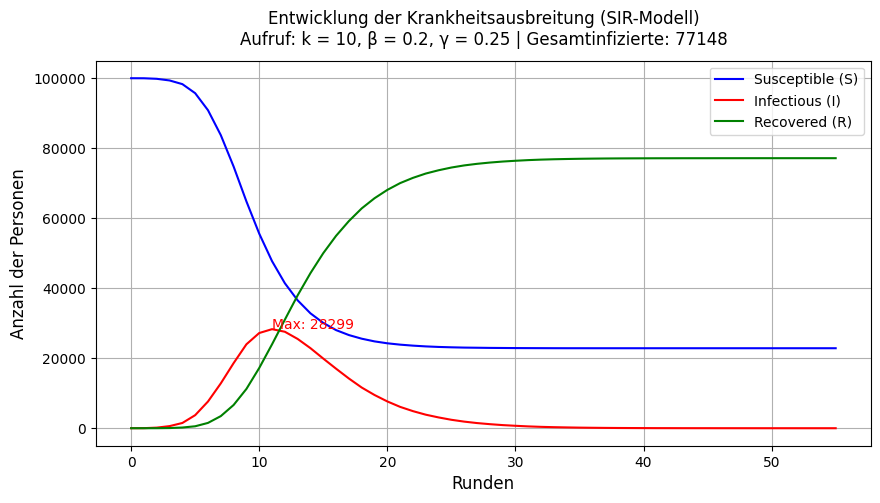

In [48]:
# Fixe Variablen
k = 10
p_recover = 0.25

# Veränderliche Variable in der Simulation
p_infect = 0.20

# Simulation ausführen
results, total_infected = disease_spread_simulation(G, k, p_infect, p_recover)

# Liniendiagramm plotten
plot_sir(results, total_infected)

<h4 class="custom-title">Interpretation</h4>

<div class="antwort-text">
Die Infektionswahrscheinlichkeit mit $\beta = 0.20$ ist relativ hoch. Das bedeutet, dass sich die Krankheit schnell im Netzwerk ausbreitet.
    <ul>
        <li>Der Anteil der Infizierten $I$ steigt schnell an und erreicht nach ca. 11 Runden seinen Höhepunkt bei etwas unter 30.000 Infizierten.</li>
        <li>Der Anteil an krankheitsanfälligen Personen $S$ sinkt schnell ab, da viele Menschen schnell infiziert werden.</li>
        <li>Die Zahl der Genesenen $R$ steigt nach dem Höhepunkt der Infektion.</li>
    </ul>
Am Ende der Ausbreitung bleiben noch knapp über 20.000 Personen ohne Infektion und 77.480 Personen sind von der Krankheit genesen.
</div>

----

<h3 class="custom-title">Aufruf $\beta = 0.1$</h3>

Seed gesetzt: 6


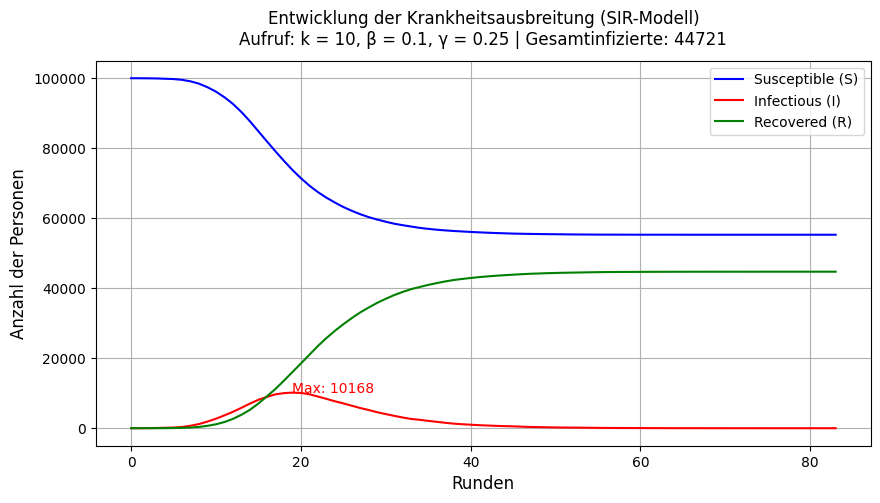

In [49]:
# Veränderliche Variable in der Simulation
p_infect = 0.10

# Simulation ausführen
results, total_infected = disease_spread_simulation(G, k, p_infect, p_recover)

# Liniendiagramm plotten
plot_sir(results, total_infected)

<h4 class="custom-title">Interpretation</h4>

<div class="antwort-text">
Die Infektionswahrscheinlichkeit mit $\beta = 0.10$ ist deutlich geringer wodurch sich die Ausbreitung der Krankheit verlangsamt
    <ul>
        <li>Der Anteil der Infizierten $I$ steigt langsamer an und erreicht nach ca. 23 Runden seinen Höhepunkt bei in etwa 10.000 Personen.</li>
        <li>Der Anteil an krankheitsanfälligen Personen $S$ sinkt langsamer ab.</li>
        <li>Die Zahl der Genesenen $R$ steigt nach dem Höhepunkt der Infektion.</li>
    </ul>
Nach Ende der Krankheitsausbreitung verbleiben ca. 58.000 Personen ohne Infektion und 43.839 Personen sind von der Krankheit genesen.
</div>


<h3 class="custom-title">Aufruf $\beta = 0.04$</h3>

Seed gesetzt: 6


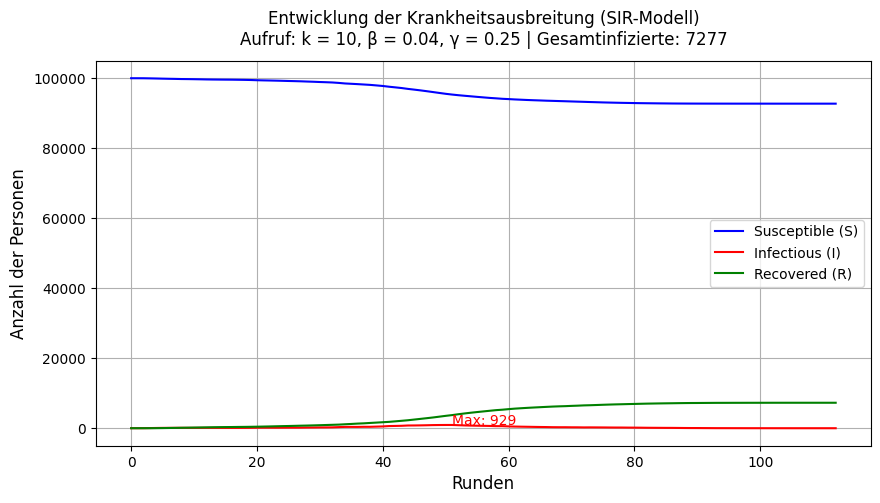

In [50]:
# Veränderliche Variable in der Simulation
p_infect = 0.04

# Simulation ausführen
results, total_infected = disease_spread_simulation(G, k, p_infect, p_recover)

# Liniendiagramm plotten
plot_sir(results, total_infected)

<h4 class="custom-title">Interpretation</h4>

<div class="antwort-text">
Die Infektionswahrscheinlichkeit mit $\beta = 0.04$ ist sehr niedrig was die Ausbreitung der Krankheit stark hemmt.
    <ul>
        <li>Der Anteil der Infizierten $I$ steigt nur minimal.</li>
        <li>Der Anteil an krankheitsanfälligen Personen $S$ sinkt nur leicht ab da es nicht viele infizierte Personen gibt.</li>
        <li>Die Zahl der Genesenen $R$ steigt nach dem Höhepunkt der Infektionen.</li>
    </ul>

Nach Ende der Krankheitsausbreitung verbleibt der Großteil der Personen ohne je eine Infektion gehabt zu haben.
</div>



<h3 class="custom-title">Vergleich der drei Infektionswahrscheinlichkeiten</h3>

In [51]:
# Simulationen mit verschiedenen Infektionswahrscheinlichkeiten
k = 10
p_recover = 0.25

# Ergebnisse für die drei β-Werte
p_infect_values = [0.20, 0.10, 0.04]
infectious_results = {}
rounds_per_beta = {}  # Um die Anzahl der Runden pro Beta zu speichern

# Simulation ausführen und Ergebnisse speichern
for p_infect in p_infect_values:
    results, total_infected = disease_spread_simulation(G, k, p_infect, p_recover)
    infectious_results[p_infect] = results["I"]  # Nur den "Infectious"-Zustand speichern
    rounds_per_beta[p_infect] = len([i for i in results["I"] if i > 0])  # Länge der Runden für diesen Beta-Wert


Seed gesetzt: 6
Seed gesetzt: 6
Seed gesetzt: 6


<h4 class="custom-title">Plot Vergleich</h4>

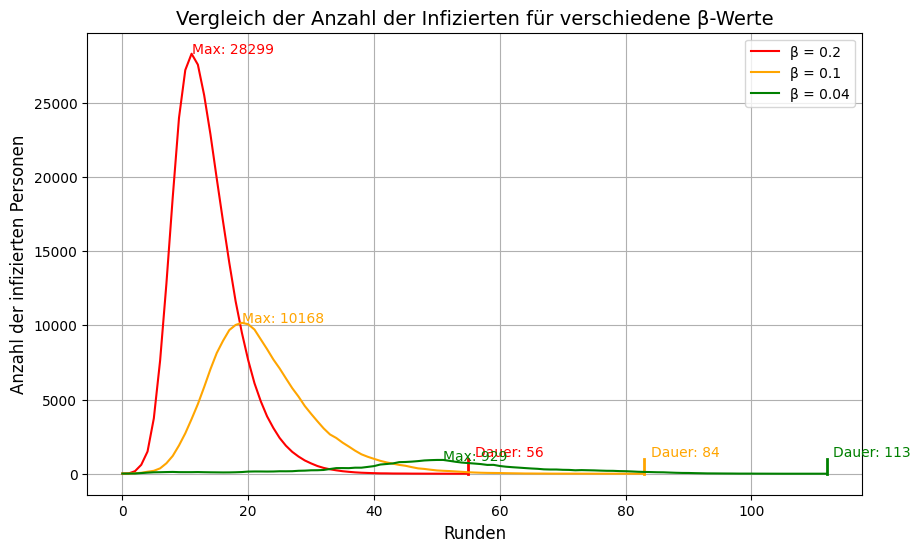

In [52]:
# Plotten der Ergebnisse
plt.figure(figsize=(10, 6))

# Farben für die verschiedenen β-Werte
color_map = {0.20: "red", 0.10: "orange", 0.04: "green"}

for p_infect, infectious in infectious_results.items():
    rounds = range(len(infectious))
    plt.plot(rounds, infectious, label=f'β = {p_infect}', color=color_map[p_infect], linewidth=1.5)

    # Höhepunkt der Infektionskurve finden
    max_infectious = max(infectious)
    max_round = infectious.index(max_infectious)
    
    # Annotation hinzufügen
    plt.annotate(
        f'Max: {max_infectious}',
        xy=(max_round, max_infectious),
        xytext=(max_round, max_infectious),
        fontsize=10,
        color=color_map[p_infect]
    )
  
    # Gesamtdauer der Epidemie berechnen und an der x-Achse markieren
    duration = len([i for i in infectious if i > 0])  # Anzahl der Runden mit aktiven Infizierten
    end_round = duration - 1  # Letzte Runde mit Infizierten

    # Markierung an der x-Achse für letzte Runde
    plt.plot(
        [end_round, end_round], [0, 1000],
        color=color_map[p_infect],
        linestyle='-', linewidth=2
    )
    plt.text(
        end_round + 1, 
        1200,
        f'Dauer: {duration}', 
        fontsize=10,
        color=color_map[p_infect]
    )
    
# Achsenbeschriftungen und Titel
plt.title("Vergleich der Anzahl der Infizierten für verschiedene β-Werte", fontsize=14)
plt.xlabel("Runden", fontsize=12)
plt.ylabel("Anzahl der infizierten Personen", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

<h4 class="custom-title">Interpretation Vergleich Beta</h4>

<div class="antwort-text">
Ein niedriger Wert von $\beta$ reduziert die Geschwindigkeit und das Ausmaß der Krankheitsausbreitung:
<ul>
    <li>Hoher Wert: Schnelle und breite Ausbreitung, größere Krankheitswelle, klingt jedoch auch schneller wieder ab da mehr Personen in kürzerer Zeit die Krankheit durchmachen</li>
    <li>Niedriger Wert: Langsamere Ausbreitung, geringere Krankheitswelle, dadurch zirkuliert die Krankheit länger in niedrigem Ausmaß</li>
</ul>
In der realen Welt entspricht $\beta$ Maßnahmen wie Impfungen, Maskenpflicht, soziale Distanzierung etc. Wenn $\beta$ von natur aus niedrig ist, deutet es darauf, hin dass die Krankheit wenig ansteckend ist.
</div>

----

<h2 class="custom-title">Aufgabe 5: Einführung eines wirksamen Impfstoffs</h2>

<div class="angabe-text">
Erweitern Sie Ihre Simulation so, dass sie eine Durchimpfungsrate $\alpha \in [0,1]$ berücksichtigt:
    <ul>
        <li>Zu Beginn wird ein Anteil $\alpha$ aller Personen zufällig geimpft, wodurch sie immun gegen die Krankheit sind.</li>
        <li>Überlegen Sie, ob die Wahl der zu Beginn infizierten Personen angepasst werden muss.</li>
    </ul>
</div>


<h3 class="custom-title">Erweiterte Funktion</h3>

In [53]:
# Anteil an zufällig geimpften Personen
def initial_vaccinated(G, p_vaccinated):
    states = {}
    for node in G.nodes():
        if random.random() < p_vaccinated:
            states[node] = "V"  # vaccinated
        else:
            states[node] = "S"  # susceptible - alle nicht geimpften Personen können sich zunächst anstecken
    return states

In [54]:
def disease_spread_simulation_vaccine(G, k, p_infect, p_recover, initial_states):
    """
    :param G: Graph
    :param k: Anzahl initial infizierter Personen
    :param p_infect: Wahrscheinlichkeit, dass I, S infiziert
    :param p_recover: Wahrscheinlichkeit, dass I gesund wird
    :param initial_states: Anfängliche Zustände der Knoten
    :return: Liste an Ergebnissen jeder Runde
    """

    # Liste aller Knoten im Graphen
    nodes = list(G.nodes())
    
    # Initialisierung der Zustände mit Impfanteil - die restlichen Knoten sind anfangs "S"
    # Kopie der anfänglichen Zustände, um Mutationen zu vermeiden
    states = initial_states.copy()
    
    # Liste aller nicht geimpften Knoten
    non_vaccinated = [node for node, state in states.items() if state == "S"]
    
    # Bei Durchimpfungsrate 1 wäre die non_vaccinated Liste leer - um Fehler zu vermeiden wird dann 0 zurückgegeben
    if not non_vaccinated: 
        return 0 
    
    # Wöhlt eine zufällige Auswahl an k Knoten aus die zu Beginn infiziert werden
    # Wenn non_vaccinated weniger als k Knoten enthält, wird die gesamte Liste non_vaccinated verwendet
    if len(non_vaccinated) < k:
        initial_infectious = non_vaccinated
    else:
        initial_infectious = random.sample(non_vaccinated, k)

    # Aktualisiere die Zustände dieser initial infizierten Knoten zu "I"
    for node in initial_infectious:
        states[node] = "I"
        
    # Wenn es keine initial infizierten Personen gibt wird direkt 0 zurückgegeben
    if not initial_infectious:
        return 0 

    # Verfolge nur aktive Infizierte
    active_infectious = set(initial_infectious)
    
    # Liste der gesamt infizierten Personen
    total_infected = set(initial_infectious)

    while active_infectious:
        # Solange es infizierte Personen gibt
        
        # Sets für Zustandsänderungen in dieser Runde
        to_infect = set()  # Personen, die in dieser Runde infiziert werden
        to_recover = set()  # Personen, die in dieser Runde genesen

        for node in active_infectious:
            for neighbor in G.neighbors(node): # Infizieren der Nachbarn
                if states[neighbor] == "S" and random.random() < p_infect:
                    to_infect.add(neighbor)
                    total_infected.add(neighbor)

            # Genesung der aktuellen Person
            if random.random() < p_recover:
                to_recover.add(node)
        
        # Zustände aktualisieren
        for node in to_infect:
            states[node] = "I"
        for node in to_recover:
            states[node] = "R"
        
        # Alle in dieser Runde neu infizierten werden hinzugefügt
        active_infectious.update(to_infect)
        
        # Knoten die in dieser Runde genesen sind, werden aus Liste entfernt
        active_infectious.difference_update(to_recover)

    return len(total_infected)


<h3 class="custom-title">Simulation für verschiedene Alpha</h3>

<div class="angabe-text">
Simulieren Sie die Krankheitsausbreitung für verschiedene Werte von $\alpha = 0, 0.01, 0.02, \dots, 1$ ($\beta$ und $\gamma$ sollen wie in Aufgabe 4 gewählt werden):
    <ul>
        <li>Speichern Sie für jeden Aufruf die Anzahl der Personen, die irgendwann im Laufe der Ausbreitung infiziert waren.</li>
        <li>Visualisieren und interpretieren Sie die Ergebnisse.</li>
    </ul>
</div>

<h4 class="custom-title">Variablen</h4>

In [55]:
# Globale Parameter
p_vaccinated_values = [i / 100.0 for i in range(101)]  # Werte von 0 bis 1 in Schritten von 0.01
k = 10  # Anzahl initial infizierter Personen
p_recover = 0.25  # Genesungswahrscheinlichkeit

<h4 class="custom-title">Funktion zur Durchführung der Simulation für verschiedene Durchimpfungsraten</h4>

In [56]:
from tqdm.notebook import tqdm

def run_vaccination_simulation(G, k, p_infect, p_recover, p_vaccinated_values):
    set_seed(4)
    results = []
    desc = f"Simuliere Durchimpfungsraten - Aufruf: β = {p_infect:.2f}, γ = {p_recover:.2f}"
    for p_vacc in tqdm(p_vaccinated_values, desc=desc):
        initial_states = initial_vaccinated(G, p_vacc)
        infected = disease_spread_simulation_vaccine(G, k, p_infect, p_recover, initial_states)
        results.append(infected)
    return results

<h4 class="custom-title">Funktion zum Plotten der Ergebnisse</h4>

In [57]:
def plot_comparative_sir_results(p_vaccinated_values, results_dict, min_vaccination_rates=None):
    plt.figure(figsize=(10, 5))
    
    # Fixe Farben für die drei β-Werte
    color_map = {
        0.20: "red",
        0.10: "orange",
        0.04: "green"
    }
    
    # Plot der Ergebnisse
    for beta, values in results_dict.items():
        plt.plot(
            p_vaccinated_values, 
            values, 
            label=f'Infektionsrate: β = {beta}',
            color=color_map[beta],
            linewidth=1.5
        )
    
    # Titel und Beschriftungen
    plt.title(
        f"Einfluss der Durchimpfungsrate auf die Infektionsausbreitung\n bei unterschiedlichen Infektionswahrscheinlichkeiten\n" 
        f"Aufruf: k = {k}, γ = {p_recover}",
        fontsize=12, 
        pad=25
    )
    
    # Vertikale Linien für minimale Durchimpfungsraten
    if min_vaccination_rates is not None:
        for beta, alpha in min_vaccination_rates.items():
            plt.axvline(
                x=alpha, 
                color=color_map[beta],
                linestyle='--', 
                linewidth=1.2, 
                label=f'Min α für β = {beta}'
            )
            # Beschriftung
            plt.text(
                alpha + 0.01, 
                plt.ylim()[1] * 0.8,
                f'α = {alpha:.2f}', 
                color=color_map[beta], 
                fontsize=10
            )
    
    # Achsenbeschriftungen und Formatierung
    plt.xlabel('Durchimpfungsrate (α) [%]', fontsize=12)
    plt.ylabel('Anzahl der gesamten infizierten\n Personen des Aufrufs', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h4 class="custom-title">Plotten der Ergebnisse</h4>

In [58]:
# Simulationen für verschiedene Infektionswahrscheinlichkeiten
infection_probabilities = [0.20, 0.10, 0.04]  # Verschiedene β-Werte
results_dict = {}

for beta in infection_probabilities:
    results_dict[beta] = run_vaccination_simulation(G, k, beta, p_recover, p_vaccinated_values)


Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.20, γ = 0.25:   0%|          | 0/101 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.10, γ = 0.25:   0%|          | 0/101 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.04, γ = 0.25:   0%|          | 0/101 [00:00<?, ?it/s]

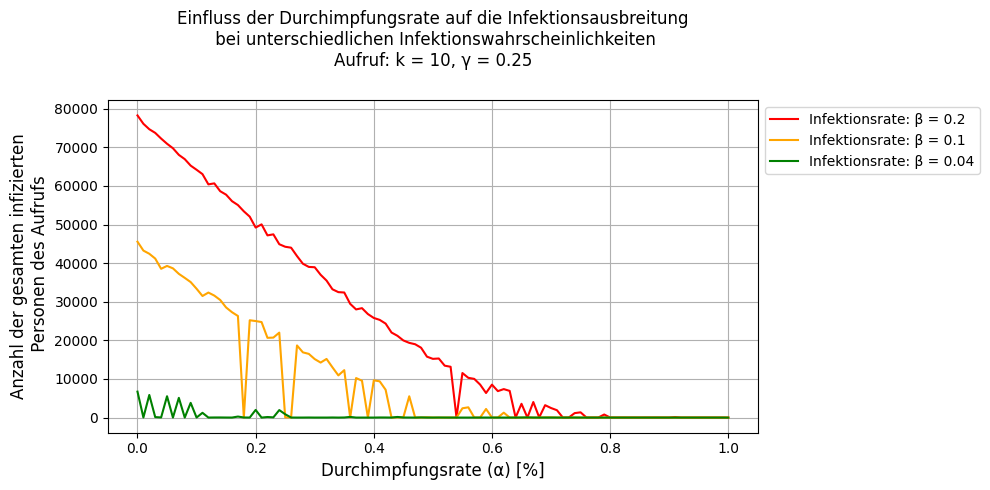

In [59]:
# Ergebnisse plotten
plot_comparative_sir_results(p_vaccinated_values, results_dict)

<h4 class="custom-title">Geglättetes Ergebnis um Ausreißer durch die Zufallssimulation auszugleichen</h4>

In [60]:
def moving_average(data, window_size=3):
    return [
        sum(data[i:i + window_size]) / window_size
        for i in range(len(data) - window_size + 1)
    ]

In [61]:
window_size = 5  # Fenstergröße für den gleitenden Durchschnitt

smoothed_results_dict = {
    beta: moving_average(values, window_size=window_size)
    for beta, values in results_dict.items()
}

adjusted_p_vaccinated_values = p_vaccinated_values[:len(p_vaccinated_values) - window_size + 1]

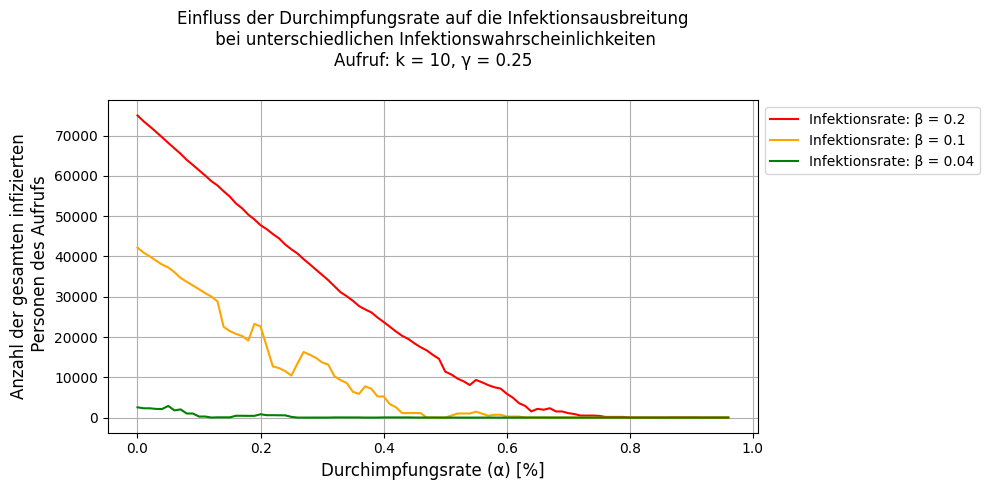

In [62]:
plot_comparative_sir_results(adjusted_p_vaccinated_values, smoothed_results_dict)

<h4 class="custom-title">Minimale Durchimpfungsrate für < 1% infizierte Personen</h4>

In [63]:
def find_min_vaccination_rate_smoothed(p_vaccinated_values, smoothed_results_dict, threshold, window_size=5):
    min_rates = {}
    adjusted_vaccinated_values = p_vaccinated_values[:len(p_vaccinated_values) - window_size + 1]  # Anpassung an geglättete Werte
    
    for beta, values in smoothed_results_dict.items():
        for alpha, infected in zip(adjusted_vaccinated_values, values):
            if infected <= threshold:  # Schwelle erreicht
                min_rates[beta] = alpha
                break
    return min_rates


In [64]:
threshold = len(G.nodes) / 100 # 1% der Knoten

# Finde minimale Durchimpfungsraten mit geglätteten Daten
min_vaccination_rates = find_min_vaccination_rate_smoothed(
    p_vaccinated_values, smoothed_results_dict, threshold, window_size=window_size
)

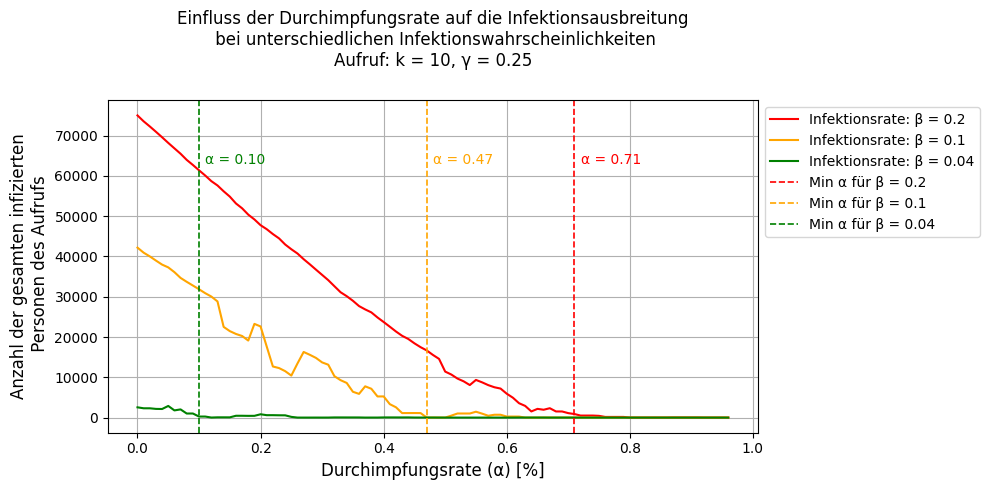

In [65]:
plot_comparative_sir_results(adjusted_p_vaccinated_values, smoothed_results_dict, min_vaccination_rates=min_vaccination_rates)


<h4 class="custom-title">Interpretation</h4>

<div class="antwort-text">

<ul>
    <li>Für alle drei betrachteten Infektionswahrscheinlichkeiten ($\beta = 0.2, \beta = 0.1, \beta = 0.04 $) nimmt die Anzahl der jemals infizierten Personen mit zunehmender Durchimpfungsrate ab.</li>
    <li>Dies verdeutlicht, dass Impfungen einen signifikanten Einfluss auf die Reduktion der Krankheitsausbreitung haben, insbesondere bei höheren Durchimpfungsraten.</li>
</ul>

<strong>Kurven für verschiedene Infektionswahrscheinlichkeiten $\beta$:</strong>

<ul>
    <li>$\beta = 0.2$ (rot)</li>
        <ul>
            <li>Ohne Impfungen ($\alpha = 0$) liegt die Gesamtzahl jemals infizierter Personen bei etwa 75.000.</li>
            <li>Erst bei einer Durchimpfungsrate von $\alpha \approx 0.70$ wird die Krankheitsausbreitung auf unter 1% reduziert.</li>
            <li>Bei einer hohen Infektionswahrscheinlichkeit benötigt es eine sehr hohe Durchimpfungsrate, um die Ausbreitung einzudämmen.</li>
        </ul>
    <li>$\beta = 0.1$ (orange)</li>
        <ul>
            <li>Ohne Impfungen liegt die Gesamtzahl jemals infizierter Personen bei etwa 40.000.</li>
            <li>Bereits bei einer Durchimpfungsrate von $\alpha \approx 0.50$ liegt die Krankheitsausbreitung unter 1% der Bevölkerung.</li>
            <li>Bei einer mittleren Infektionswahrscheinlichkeit sind moderate Durchimpfungsraten ausreichend.</li>
        </ul>
    <li>$\beta = 0.04$ (grün)</li>
        <ul>
            <li>Die geringe Infektionswahrscheinlichkeit führt zu einer minimalen Ausbreitung der Krankheit.</li>
            <li>Eine Durchimpfungsrate von nur $\alpha \approx 0.04$ reicht aus, um die Ausbreitung zu stoppen.</li>
            <li>Bei einer niedrigen Infektionswahrscheinlichkeit reichen bereits geringe Durchimpfungsraten, um die Krankheit fast vollständig zu stoppen.</li>
        </ul>
</ul>

<h3 class="custom-title">Begrenzter Impfstoff</h3>

<div class="angabe-text">
Angenommen, der Impfstoff ist nur in begrenztem Umfang verfügbar, sodass nur eine Durchimpfungsrate von $\alpha = 0.05$ erreicht werden kann:
    <ul>
        <li>Überlegen Sie sich zwei Möglichkeiten, wie die zu impfenden Personen nicht mehr zufällig, sondern gezielt und objektiv ausgewählt werden können.</li>
        <li>Erweitern Sie Ihre Simulation entsprechend für diese beiden Ansätze und vergleichen Sie die Ergebnisse mit der zufälligen Wahl der geimpften Personen.</li>
    </ul>

In [66]:
p_vaccinated_values_limit = [i / 100.0 for i in range(0,6)]
infection_probabilities = [0.20, 0.10, 0.04]

<h4 class="custom-title"> Möglichkeit 1: Personen mit den meisten Kontakten</h4>
<div class="antwort-text">Personen mit den meisten direkten Verbindungen zu anderen Personen werden zuerst geimpft. Diese Strategie zielt darauf ab, die potenziell größten Überträger (Superspreader) der Krankheit zu immunisieren.</div>

In [67]:
def initial_vaccinated_priority_neighbors(nodes, p_vaccinated):
    states = {node: "S" for node in nodes}

    num_vaccinated = int(len(nodes) * p_vaccinated)
    
    # Berechne die Degree-Zentralität für jeden Knoten
    centrality = nx.degree_centrality(G)
    
    # Sortiere die Knoten nach ihrer Degree-Zentralität absteigend
    sorted_nodes = sorted(G.nodes, key=lambda x: centrality[x], reverse=True)

    for node in sorted_nodes[:num_vaccinated]:
        states[node] = "V"
    
    return states

In [68]:
def run_vaccination_simulation_priority_neighbors(G, k, p_infect, p_recover, p_vaccinated_values_limit):
    set_seed(4)
    results = []
    desc = f"Simuliere Durchimpfungsraten mit Limit für Nachbarn - Aufruf: β = {p_infect:.2f}, γ = {p_recover:.2f}"
    for p_vacc in tqdm(p_vaccinated_values_limit, desc=desc):
        initial_states = initial_vaccinated_priority_neighbors(G, p_vacc)
        infected = disease_spread_simulation_vaccine(G, k, p_infect, p_recover, initial_states)
        results.append(infected)
    return results

<h4 class="custom-title"> Möglichkeit 2: Personen mit hoher Eigenvektor-Zentralität</h4>
<div class="antwort-text">Diese Methode berücksichtigt nicht nur die Anzahl der direkten Kontakte eines Individuums, sondern auch die Zentralität dieser Kontakte innerhalb des gesamten Netzwerks. Ein hoher Eigenvector-Wert bedeutet, dass eine Person nicht nur viele Kontakte hat, sondern dass diese Kontakte selbst zentral und gut verbunden sind.</div>

In [69]:
def initial_vaccinated_priority_eigenvector(nodes, p_vaccinated):
    states = {node: "S" for node in nodes}  # Standardmäßig alle anfällig (S)

    # Berechne die Anzahl der Knoten, die geimpft werden sollen
    num_vaccinated = int(len(nodes) * p_vaccinated)

    # Berechne Eigenvector-Zentralität
    eigenvector = nx.eigenvector_centrality(G)
    
    # Sortiere Knoten nach Eigenvector-Zentralität absteigend
    sorted_nodes = sorted(nodes, key=lambda x: eigenvector[x], reverse=True)
    
    # Wähle die Top `num_vaccinated` Knoten aus und markiere sie als geimpft
    for node in sorted_nodes[:num_vaccinated]:
        states[node] = "V"
    
    return states

In [70]:
def run_vaccination_simulation_priority_eigenvector(G, k, p_infect, p_recover, p_vaccinated_values_limit):
    set_seed(4)
    results = []
    desc = f"Simuliere Durchimpfungsraten mit Limit für Eigenvector - Aufruf: β = {p_infect:.2f}, γ = {p_recover:.2f}"
    for p_vacc in tqdm(p_vaccinated_values_limit, desc=desc):
        initial_states = initial_vaccinated_priority_eigenvector(G, p_vacc)
        infected = disease_spread_simulation_vaccine(G, k, p_infect, p_recover, initial_states)
        results.append(infected)
    return results

<h4 class="custom-title">Vergleich zwischen zufälliger Auswahl, meisten Nachbarn und Vector Zentralität</h4>

In [ ]:
# Vergleich der drei Ansätze
results_dict_random = {}
results_dict_neighbors = {}
results_dict_eigenvector = {}

for beta in tqdm(infection_probabilities, desc=f"Gesamtlaufzeit Vergleich"):
    # Zufällige Impfung
    results_dict_random[beta] = run_vaccination_simulation(G, k, beta, p_recover, p_vaccinated_values_limit)
    
    # Gezielte Impfung nach Nachbarschaft
    results_dict_neighbors[beta] = run_vaccination_simulation_priority_neighbors(G, k, beta, p_recover, p_vaccinated_values_limit)
    
    # Gezielte Impfung nach Zentralität
    results_dict_eigenvector[beta] = run_vaccination_simulation_priority_eigenvector(G, k, beta, p_recover, p_vaccinated_values_limit)

Gesamtlaufzeit Vergleich:   0%|          | 0/3 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.20, γ = 0.25:   0%|          | 0/6 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Nachbarn - Aufruf: β = 0.20, γ = 0.25:   0%|          | 0/6 [00:00<…

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Eigenvector - Aufruf: β = 0.20, γ = 0.25:   0%|          | 0/6 [00:…

Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.10, γ = 0.25:   0%|          | 0/6 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Nachbarn - Aufruf: β = 0.10, γ = 0.25:   0%|          | 0/6 [00:00<…

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Eigenvector - Aufruf: β = 0.10, γ = 0.25:   0%|          | 0/6 [00:…

Seed gesetzt: 4


Simuliere Durchimpfungsraten - Aufruf: β = 0.04, γ = 0.25:   0%|          | 0/6 [00:00<?, ?it/s]

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Nachbarn - Aufruf: β = 0.04, γ = 0.25:   0%|          | 0/6 [00:00<…

Seed gesetzt: 4


Simuliere Durchimpfungsraten mit Limit für Eigenvector - Aufruf: β = 0.04, γ = 0.25:   0%|          | 0/6 [00:…

In [ ]:
def plot_comparative_vaccination_results(p_vaccinated_values_limit, results_dict_random, results_dict_neighbors, results_dict_eigenvector):
    plt.figure(figsize=(12, 6))
    
    color_map = {
        0.20: "red",
        0.10: "orange",
        0.04: "green"
    }
    
    for beta in infection_probabilities:
        plt.plot(
            p_vaccinated_values_limit, results_dict_random[beta],
            label=f'Zufällig (β = {beta})', color=color_map[beta], linestyle='--'
        )
        plt.plot(
            p_vaccinated_values_limit, results_dict_neighbors[beta],
            label=f'Degree Zentralität (β = {beta})', color=color_map[beta], linestyle='-'
        )
        plt.plot(
            p_vaccinated_values_limit, results_dict_eigenvector[beta],
            label=f'Eigenvektor Zentralität (β = {beta})', color=color_map[beta], linestyle=':'
        )
    
    plt.title("Vergleich der Impfstrategien bei limitierter Durchimpfungsrate", fontsize=14, pad=20)
    plt.xlabel('Durchimpfungsrate (α) [%]', fontsize=12)
    plt.ylabel('Anzahl der gesamten infizierten Personen', fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_comparative_vaccination_results(
    p_vaccinated_values_limit, 
    results_dict_random, 
    results_dict_neighbors, 
    results_dict_eigenvector,
)

<h4 class="custom-title">Interpretation</h4>

<div class="antwort-text">

<p> Die gezielte Auswahl von Personen die geimpft werden funktioniert besser als die Zufällige. Besonders hebt sich die Auswahl der Knoten mit den meisten Nachbarn ab. Die Nachbarschaftspriorität funktioniert besser, weil sie auf lokale Dynamiken der Epidemien ausgerichtet ist:</p>

<ul>
    <li>Sie blockiert aktiv und direkt die Übertragungspfade von “Super-Spreader”-Knoten (Knoten mit hohem Grad).</li>
    <li>Die Eigenvektor-Zentralität ist stärker auf globale Effekte fokussiert, die für langsamer ablaufende Prozesse wie Informationsverbreitung nützlich sind, jedoch bei schnell eskalierenden Epidemien weniger effizient.</li>
</ul>

</div>

In [ ]:
import pandas as pd

# Funktionen für Degree und Eigenvector Zentralitäten
def get_top_degree_centrality_nodes(G, top_n=50):
    centrality = nx.degree_centrality(G)
    sorted_nodes = sorted(G.nodes(), key=lambda x: centrality[x], reverse=True)[:top_n]
    nodes_info = [{'Node': node, 'Degree Centrality': centrality[node], 'Degree': G.degree[node]} for node in sorted_nodes]
    return pd.DataFrame(nodes_info)

def get_top_eigenvector_centrality_nodes(G, top_n=50):
    eigenvector_centrality = nx.eigenvector_centrality(G)
    sorted_nodes = sorted(G.nodes(), key=lambda x: eigenvector_centrality[x], reverse=True)[:top_n]
    nodes_info = [{'Node': node, 'Eigenvector Centrality': eigenvector_centrality[node], 'Degree': G.degree[node]} for node in sorted_nodes]
    return pd.DataFrame(nodes_info)

# DataFrames erstellen
degree_df = get_top_degree_centrality_nodes(G)
eigenvector_df = get_top_eigenvector_centrality_nodes(G)

# Reset Index für beide DataFrames
degree_df.reset_index(drop=True, inplace=True)
eigenvector_df.reset_index(drop=True, inplace=True)

# Beide DataFrames nebeneinander anzeigen
combined_df = pd.concat([degree_df, eigenvector_df], axis=1, keys=['Degree Centrality', 'Eigenvector Centrality'])

pd.set_option('display.max_colwidth', 20)  # Maximale Breite der Spalteninhalte
pd.set_option('display.width', 1000)       # Gesamtbreite der Ausgabe

print(combined_df)